In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

sns.set(style='white', context='notebook', palette='deep')

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
dataset=pd.concat(objs=[train,test],axis=0).reset_index(drop=True)

C:\Users\emondsa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
train.shape

(1460, 81)

In [4]:
test.shape

(1459, 80)

In [5]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
tran_int=train.select_dtypes(include=['int64']).copy()

In [8]:
tran_int.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [9]:
def outlier(df,n, features):
    outlier_indices=[]
    for col in features:
        Q1=np.percentile(df[col],25)
        Q3=np.percentile(df[col],75)
        IQR=Q3-Q1
        outlier_step=1.5*IQR
        outlier_list_col=df[(df[col]<Q1-outlier_step) |(df[col]>Q3+outlier_step)].index
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices) 
    multiple_outlier = list( k for k, v in outlier_indices.items() if v > n )
     
    return multiple_outlier
Outlier_to_drop=outlier(train,3, ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'])

Outlier_to_drop=outlier(test,3, ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'])


C:\Users\emondsa\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [10]:
train.loc[Outlier_to_drop]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
79,80,50,RM,60.0,10440,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,110000
374,375,60,RL,65.0,8200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,219500
630,631,70,RM,50.0,9000,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Abnorml,124000
675,676,160,RL,24.0,2289,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,148500
1293,1294,60,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,3,2006,WD,Normal,162900
485,486,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,147000
579,580,50,RM,81.0,12150,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,131500
728,729,90,RL,85.0,11475,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,COD,Abnorml,110000
964,965,60,RL,80.0,11316,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,214900
1043,1044,60,RL,86.0,11839,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,262280


In [11]:
test.loc[Outlier_to_drop]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
79,1540,190,RM,100.0,9045,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Abnorml
374,1835,190,RM,41.0,5852,Pave,NaN,IR3,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal
630,2091,190,RM,63.0,11426,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal
675,2136,190,RM,60.0,10320,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal
1293,2754,190,RL,94.0,22136,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
485,1946,20,RL,NaN,31220,Pave,NaN,IR1,Bnk,NaN,...,0,0,NaN,NaN,Shed,750,5,2008,WD,Normal
579,2040,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2008,WD,Family
728,2189,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal
964,2425,70,RL,113.0,21281,Pave,NaN,Reg,Lvl,AllPub,...,156,0,NaN,NaN,NaN,0,11,2007,WD,Family
1043,2504,50,RL,104.0,23920,Pave,NaN,Reg,Lvl,AllPub,...,0,444,NaN,NaN,NaN,0,4,2007,WD,Normal


In [12]:
train = train.drop(Outlier_to_drop, axis = 0).reset_index(drop=True)

In [13]:
test = test.drop(Outlier_to_drop, axis = 0).reset_index(drop=True)

In [14]:
print(train.shape ,test.shape)

(1429, 81) (1428, 80)


In [15]:
dataset

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,546,546,0,NaN,3,Twnhs,TA,No,0.0,0.0,...,WD,0,Pave,5,546.0,AllPub,0,1970,1970,2006
2915,546,546,0,NaN,3,TwnhsE,TA,No,252.0,0.0,...,WD,0,Pave,6,546.0,AllPub,0,1970,1970,2006
2916,1224,0,0,NaN,4,1Fam,TA,No,1224.0,0.0,...,WD,0,Pave,7,1224.0,AllPub,474,1960,1996,2006
2917,970,0,0,NaN,3,1Fam,TA,Av,337.0,0.0,...,WD,0,Pave,6,912.0,AllPub,80,1992,1992,2006


In [16]:
null_columns=dataset.columns[dataset.isnull().any()]
dataset[null_columns].isnull().sum()


Alley           2721
BsmtCond          82
BsmtExposure      82
BsmtFinSF1         1
BsmtFinSF2         1
BsmtFinType1      79
BsmtFinType2      80
BsmtFullBath       2
BsmtHalfBath       2
BsmtQual          81
BsmtUnfSF          1
Electrical         1
Exterior1st        1
Exterior2nd        1
Fence           2348
FireplaceQu     1420
Functional         2
GarageArea         1
GarageCars         1
GarageCond       159
GarageFinish     159
GarageQual       159
GarageType       157
GarageYrBlt      159
KitchenQual        1
LotFrontage      486
MSZoning           4
MasVnrArea        23
MasVnrType        24
MiscFeature     2814
PoolQC          2909
SalePrice       1459
SaleType           1
TotalBsmtSF        1
Utilities          2
dtype: int64

In [17]:
dataset['BsmtFullBath'].unique()

array([ 1.,  0.,  2.,  3., nan])

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

In [19]:
data_cat= dataset.select_dtypes(include=['object']).copy()

In [20]:
data_int= dataset.select_dtypes(include=['float64','int64']).copy()

In [21]:
#data_int= dataset.select_dtypes(include=['int64']).copy()

In [22]:
data_cat

,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,...,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
0,NaN,1Fam,TA,No,GLQ,Unf,Gd,Y,Norm,Norm,...,NaN,CollgCr,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
1,NaN,1Fam,TA,Gd,ALQ,Unf,Gd,Y,Feedr,Norm,...,NaN,Veenker,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
2,NaN,1Fam,TA,Mn,GLQ,Unf,Gd,Y,Norm,Norm,...,NaN,CollgCr,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
3,NaN,1Fam,Gd,No,ALQ,Unf,TA,Y,Norm,Norm,...,NaN,Crawfor,Y,NaN,CompShg,Gable,Abnorml,WD,Pave,AllPub
4,NaN,1Fam,TA,Av,GLQ,Unf,Gd,Y,Norm,Norm,...,NaN,NoRidge,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,NaN,Twnhs,TA,No,Unf,Unf,TA,Y,Norm,Norm,...,NaN,MeadowV,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
2915,NaN,TwnhsE,TA,No,Rec,Unf,TA,Y,Norm,Norm,...,NaN,MeadowV,Y,NaN,CompShg,Gable,Abnorml,WD,Pave,AllPub
2916,NaN,1Fam,TA,No,ALQ,Unf,TA,Y,Norm,Norm,...,NaN,Mitchel,Y,NaN,CompShg,Gable,Abnorml,WD,Pave,AllPub
2917,NaN,1Fam,TA,Av,GLQ,Unf,Gd,Y,Norm,Norm,...,Shed,Mitchel,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub


In [23]:
null_columns=data_cat.columns[data_cat.isnull().any()]
data_cat[null_columns].isnull().sum()

Alley           2721
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
BsmtQual          81
Electrical         1
Exterior1st        1
Exterior2nd        1
Fence           2348
FireplaceQu     1420
Functional         2
GarageCond       159
GarageFinish     159
GarageQual       159
GarageType       157
KitchenQual        1
MSZoning           4
MasVnrType        24
MiscFeature     2814
PoolQC          2909
SaleType           1
Utilities          2
dtype: int64

In [24]:
data_cat.columns

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
       'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities'],
      dtype='object')

In [25]:
lista=['Alley','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual','Fence','FireplaceQu','GarageCond','GarageFinish','GarageQual','GarageType','MiscFeature','PoolQC']
for i in lista:
    data_cat[i]=data_cat[i].fillna("Not applicable")
    

In [26]:
data_cat

,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,...,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
0,Not applicable,1Fam,TA,No,GLQ,Unf,Gd,Y,Norm,Norm,...,Not applicable,CollgCr,Y,Not applicable,CompShg,Gable,Normal,WD,Pave,AllPub
1,Not applicable,1Fam,TA,Gd,ALQ,Unf,Gd,Y,Feedr,Norm,...,Not applicable,Veenker,Y,Not applicable,CompShg,Gable,Normal,WD,Pave,AllPub
2,Not applicable,1Fam,TA,Mn,GLQ,Unf,Gd,Y,Norm,Norm,...,Not applicable,CollgCr,Y,Not applicable,CompShg,Gable,Normal,WD,Pave,AllPub
3,Not applicable,1Fam,Gd,No,ALQ,Unf,TA,Y,Norm,Norm,...,Not applicable,Crawfor,Y,Not applicable,CompShg,Gable,Abnorml,WD,Pave,AllPub
4,Not applicable,1Fam,TA,Av,GLQ,Unf,Gd,Y,Norm,Norm,...,Not applicable,NoRidge,Y,Not applicable,CompShg,Gable,Normal,WD,Pave,AllPub
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,Not applicable,Twnhs,TA,No,Unf,Unf,TA,Y,Norm,Norm,...,Not applicable,MeadowV,Y,Not applicable,CompShg,Gable,Normal,WD,Pave,AllPub
2915,Not applicable,TwnhsE,TA,No,Rec,Unf,TA,Y,Norm,Norm,...,Not applicable,MeadowV,Y,Not applicable,CompShg,Gable,Abnorml,WD,Pave,AllPub
2916,Not applicable,1Fam,TA,No,ALQ,Unf,TA,Y,Norm,Norm,...,Not applicable,Mitchel,Y,Not applicable,CompShg,Gable,Abnorml,WD,Pave,AllPub
2917,Not applicable,1Fam,TA,Av,GLQ,Unf,Gd,Y,Norm,Norm,...,Shed,Mitchel,Y,Not applicable,CompShg,Gable,Normal,WD,Pave,AllPub


In [27]:
null_columns=data_cat.columns[data_cat.isnull().any()]
data_cat[null_columns].isnull().sum()

Electrical      1
Exterior1st     1
Exterior2nd     1
Functional      2
KitchenQual     1
MSZoning        4
MasVnrType     24
SaleType        1
Utilities       2
dtype: int64

In [28]:
data_cat['Electrical']=data_cat['Electrical'].fillna(data_cat['Electrical'].value_counts().index[0])
data_cat['Exterior1st']=data_cat['Exterior1st'].fillna(data_cat['Exterior1st'].value_counts().index[0])
data_cat['Exterior2nd']=data_cat['Exterior2nd'].fillna(data_cat['Exterior2nd'].value_counts().index[0])
data_cat['Functional']=data_cat['Functional'].fillna(data_cat['Functional'].value_counts().index[0])


data_cat['KitchenQual']=data_cat['KitchenQual'].fillna(data_cat['KitchenQual'].value_counts().index[0])
data_cat['MSZoning']=data_cat['MSZoning'].fillna(data_cat['MSZoning'].value_counts().index[0])
data_cat['SaleType']=data_cat['SaleType'].fillna(data_cat['SaleType'].value_counts().index[0])
data_cat['Utilities']=data_cat['Utilities'].fillna(data_cat['Utilities'].value_counts().index[0])

data_cat['MasVnrType']=data_cat['MasVnrType'].fillna(data_cat['MasVnrType'].value_counts().index[0])

In [29]:
null_columns=data_cat.columns[data_cat.isnull().any()]
data_cat[null_columns].isnull().sum()

Series([], dtype: float64)

In [30]:
#Use this to find which feature is ordinal, which feature is nominal.Then do encoding.

In [31]:
data_cat.columns

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
       'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities'],
      dtype='object')

In [32]:
data_cat.columns.to_list()

['Alley',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Foundation',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'MasVnrType',
 'MiscFeature',
 'Neighborhood',
 'PavedDrive',
 'PoolQC',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'Utilities']

In [33]:
data_cat_ord=data_cat[["Alley","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","KitchenQual","Functional","BsmtQual",\
"CentralAir","Electrical","ExterCond","ExterQual","Fence","FireplaceQu","GarageCond","GarageFinish","GarageQual","HeatingQC","PavedDrive",\
"PoolQC","Street","Utilities"]]
data_cat_ord

,Alley,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,KitchenQual,Functional,BsmtQual,CentralAir,Electrical,...,Fence,FireplaceQu,GarageCond,GarageFinish,GarageQual,HeatingQC,PavedDrive,PoolQC,Street,Utilities
0,Not applicable,TA,No,GLQ,Unf,Gd,Typ,Gd,Y,SBrkr,...,Not applicable,Not applicable,TA,RFn,TA,Ex,Y,Not applicable,Pave,AllPub
1,Not applicable,TA,Gd,ALQ,Unf,TA,Typ,Gd,Y,SBrkr,...,Not applicable,TA,TA,RFn,TA,Ex,Y,Not applicable,Pave,AllPub
2,Not applicable,TA,Mn,GLQ,Unf,Gd,Typ,Gd,Y,SBrkr,...,Not applicable,TA,TA,RFn,TA,Ex,Y,Not applicable,Pave,AllPub
3,Not applicable,Gd,No,ALQ,Unf,Gd,Typ,TA,Y,SBrkr,...,Not applicable,Gd,TA,Unf,TA,Gd,Y,Not applicable,Pave,AllPub
4,Not applicable,TA,Av,GLQ,Unf,Gd,Typ,Gd,Y,SBrkr,...,Not applicable,TA,TA,RFn,TA,Ex,Y,Not applicable,Pave,AllPub
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,Not applicable,TA,No,Unf,Unf,TA,Typ,TA,Y,SBrkr,...,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Gd,Y,Not applicable,Pave,AllPub
2915,Not applicable,TA,No,Rec,Unf,TA,Typ,TA,Y,SBrkr,...,Not applicable,Not applicable,TA,Unf,TA,TA,Y,Not applicable,Pave,AllPub
2916,Not applicable,TA,No,ALQ,Unf,TA,Typ,TA,Y,SBrkr,...,Not applicable,TA,TA,Unf,TA,Ex,Y,Not applicable,Pave,AllPub
2917,Not applicable,TA,Av,GLQ,Unf,TA,Typ,Gd,Y,SBrkr,...,MnPrv,Not applicable,Not applicable,Not applicable,Not applicable,TA,Y,Not applicable,Pave,AllPub


In [34]:
#data_cat_nom=data_cat[["BldgType",'Condition1','Condition2','Exterior1st','Exterior2nd','Foundation','GarageType','Heating','HouseStyle',\
                    # 'LandContour','LandSlope','LotConfig','LotShape','MSZoning','MasVnrType','MiscFeature','Neighborhood']]

In [35]:
nominal=list(filter(lambda x: x not in data_cat_ord.columns.to_list(),data_cat.columns.to_list()))
nominal

['BldgType',
 'Condition1',
 'Condition2',
 'Exterior1st',
 'Exterior2nd',
 'Foundation',
 'GarageType',
 'Heating',
 'HouseStyle',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'MasVnrType',
 'MiscFeature',
 'Neighborhood',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType']

In [36]:
data_cat_nom=data_cat[nominal]

data_cat_nom

,BldgType,Condition1,Condition2,Exterior1st,Exterior2nd,Foundation,GarageType,Heating,HouseStyle,LandContour,...,LotConfig,LotShape,MSZoning,MasVnrType,MiscFeature,Neighborhood,RoofMatl,RoofStyle,SaleCondition,SaleType
0,1Fam,Norm,Norm,VinylSd,VinylSd,PConc,Attchd,GasA,2Story,Lvl,...,Inside,Reg,RL,BrkFace,Not applicable,CollgCr,CompShg,Gable,Normal,WD
1,1Fam,Feedr,Norm,MetalSd,MetalSd,CBlock,Attchd,GasA,1Story,Lvl,...,FR2,Reg,RL,None,Not applicable,Veenker,CompShg,Gable,Normal,WD
2,1Fam,Norm,Norm,VinylSd,VinylSd,PConc,Attchd,GasA,2Story,Lvl,...,Inside,IR1,RL,BrkFace,Not applicable,CollgCr,CompShg,Gable,Normal,WD
3,1Fam,Norm,Norm,Wd Sdng,Wd Shng,BrkTil,Detchd,GasA,2Story,Lvl,...,Corner,IR1,RL,None,Not applicable,Crawfor,CompShg,Gable,Abnorml,WD
4,1Fam,Norm,Norm,VinylSd,VinylSd,PConc,Attchd,GasA,2Story,Lvl,...,FR2,IR1,RL,BrkFace,Not applicable,NoRidge,CompShg,Gable,Normal,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,Twnhs,Norm,Norm,CemntBd,CmentBd,CBlock,Not applicable,GasA,2Story,Lvl,...,Inside,Reg,RM,None,Not applicable,MeadowV,CompShg,Gable,Normal,WD
2915,TwnhsE,Norm,Norm,CemntBd,CmentBd,CBlock,CarPort,GasA,2Story,Lvl,...,Inside,Reg,RM,None,Not applicable,MeadowV,CompShg,Gable,Abnorml,WD
2916,1Fam,Norm,Norm,VinylSd,VinylSd,CBlock,Detchd,GasA,1Story,Lvl,...,Inside,Reg,RL,None,Not applicable,Mitchel,CompShg,Gable,Abnorml,WD
2917,1Fam,Norm,Norm,HdBoard,Wd Shng,PConc,Not applicable,GasA,SFoyer,Lvl,...,Inside,Reg,RL,None,Shed,Mitchel,CompShg,Gable,Normal,WD


In [37]:
data_cat["Alley"]=data_cat["Alley"].map({"Not applicable":0,"Grvl":1,"Pave":2})                                                     
data_cat["BsmtCond"]=data_cat["BsmtCond"].map({"Not applicable":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5})                              
data_cat["BsmtExposure"]=data_cat["BsmtExposure"].map({"Not applicable":0,"No":1,"Mn":2,"Av":3,"Gd":4})                             
data_cat["BsmtFinType1"]=data_cat["BsmtFinType1"].map({"Not applicable":0,"Unf":1,"LwQ":2,"Rec":3,"BLQ":4,"ALQ":5,"GLQ":6})         
data_cat["BsmtFinType2"]=data_cat["BsmtFinType2"].map({"Not applicable":0,"Unf":1,"LwQ":2,"Rec":3,"BLQ":4,"ALQ":5,"GLQ":6})         
                                
                                                                                                                                                                                                                                            
data_cat["KitchenQual"]=data_cat["KitchenQual"].map({"Po":0,"Fa":1,"TA":2,"Gd":3,"Ex":4})                               
data_cat["Functional"]=data_cat["Functional"].map({"Sal":0,"Sev":1,"Maj2":2,"Maj1":3,"Mod":4,"Min2":5,"Min1":6,"Typ":7})
data_cat["BsmtQual"]=data_cat["BsmtQual"].map({"Not applicable":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5})                              
data_cat["CentralAir"]=data_cat["CentralAir"].map({"N":0,"Y":1})                                                        
data_cat["Electrical"]=data_cat["Electrical"].map({"Mix":0,"FuseP":1,"FuseF":2,"FuseA":3,"SBrkr":4})                    
data_cat["ExterCond"]=data_cat["ExterCond"].map({"Po":0,"Fa":1,"TA":2,"Gd":3,"Ex":4})                                   
                                                                                                                        
                                                                                                                        
data_cat["ExterQual"]=data_cat["ExterQual"].map({"Po":0,"Fa":1,"TA":2,"Gd":3,"Ex":4})                                   
data_cat["Fence"]=data_cat["Fence"].map({"Not applicable":0,"MnWw":1,"GdWo":2,"MnPrv":3,"GdPrv":4})                                 
data_cat["FireplaceQu"]=data_cat["FireplaceQu"].map({"Not applicable":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5})                        
data_cat["GarageCond"]=data_cat["GarageCond"].map({"Not applicable":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5})                          
data_cat["GarageQual"]=data_cat["GarageQual"].map({"Not applicable":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5})                          
data_cat["GarageFinish"]=data_cat["GarageFinish"].map({"Not applicable":0,"Unf":1,"RFn":2,"Fin":3})                                 
                                                                                                                        
data_cat["HeatingQC"]=data_cat["HeatingQC"].map({"Po":0,"Fa":1,"TA":2,"Gd":3,"Ex":4})                                   
data_cat["PavedDrive"]=data_cat["PavedDrive"].map({"N":0,"P":1,"Y":2})                                                  
data_cat["PoolQC"]=data_cat["PoolQC"].map({"Not applicable":0,"Fa":1,"TA":2,"Gd":3,"Ex":4})                                         
data_cat["Street"]=data_cat["Street"].map({"Grvl":0,"Pave":1})                                                          
data_cat["Utilities"]=data_cat["Utilities"].map({"ELO":0,"NoSeWa":1,"AllPub":2})                                             

In [38]:
data_cat

,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,...,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
0,0,1Fam,3,1,6,1,4,1,Norm,Norm,...,Not applicable,CollgCr,2,0,CompShg,Gable,Normal,WD,1,2
1,0,1Fam,3,4,5,1,4,1,Feedr,Norm,...,Not applicable,Veenker,2,0,CompShg,Gable,Normal,WD,1,2
2,0,1Fam,3,2,6,1,4,1,Norm,Norm,...,Not applicable,CollgCr,2,0,CompShg,Gable,Normal,WD,1,2
3,0,1Fam,4,1,5,1,3,1,Norm,Norm,...,Not applicable,Crawfor,2,0,CompShg,Gable,Abnorml,WD,1,2
4,0,1Fam,3,3,6,1,4,1,Norm,Norm,...,Not applicable,NoRidge,2,0,CompShg,Gable,Normal,WD,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0,Twnhs,3,1,1,1,3,1,Norm,Norm,...,Not applicable,MeadowV,2,0,CompShg,Gable,Normal,WD,1,2
2915,0,TwnhsE,3,1,3,1,3,1,Norm,Norm,...,Not applicable,MeadowV,2,0,CompShg,Gable,Abnorml,WD,1,2
2916,0,1Fam,3,1,5,1,3,1,Norm,Norm,...,Not applicable,Mitchel,2,0,CompShg,Gable,Abnorml,WD,1,2
2917,0,1Fam,3,3,6,1,4,1,Norm,Norm,...,Shed,Mitchel,2,0,CompShg,Gable,Normal,WD,1,2


In [39]:
data_cat["HeatingQC"]

0       4
1       4
2       4
3       3
4       4
       ..
2914    3
2915    2
2916    4
2917    2
2918    4
Name: HeatingQC, Length: 2919, dtype: int64

In [40]:
data_cat_nom

,BldgType,Condition1,Condition2,Exterior1st,Exterior2nd,Foundation,GarageType,Heating,HouseStyle,LandContour,...,LotConfig,LotShape,MSZoning,MasVnrType,MiscFeature,Neighborhood,RoofMatl,RoofStyle,SaleCondition,SaleType
0,1Fam,Norm,Norm,VinylSd,VinylSd,PConc,Attchd,GasA,2Story,Lvl,...,Inside,Reg,RL,BrkFace,Not applicable,CollgCr,CompShg,Gable,Normal,WD
1,1Fam,Feedr,Norm,MetalSd,MetalSd,CBlock,Attchd,GasA,1Story,Lvl,...,FR2,Reg,RL,None,Not applicable,Veenker,CompShg,Gable,Normal,WD
2,1Fam,Norm,Norm,VinylSd,VinylSd,PConc,Attchd,GasA,2Story,Lvl,...,Inside,IR1,RL,BrkFace,Not applicable,CollgCr,CompShg,Gable,Normal,WD
3,1Fam,Norm,Norm,Wd Sdng,Wd Shng,BrkTil,Detchd,GasA,2Story,Lvl,...,Corner,IR1,RL,None,Not applicable,Crawfor,CompShg,Gable,Abnorml,WD
4,1Fam,Norm,Norm,VinylSd,VinylSd,PConc,Attchd,GasA,2Story,Lvl,...,FR2,IR1,RL,BrkFace,Not applicable,NoRidge,CompShg,Gable,Normal,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,Twnhs,Norm,Norm,CemntBd,CmentBd,CBlock,Not applicable,GasA,2Story,Lvl,...,Inside,Reg,RM,None,Not applicable,MeadowV,CompShg,Gable,Normal,WD
2915,TwnhsE,Norm,Norm,CemntBd,CmentBd,CBlock,CarPort,GasA,2Story,Lvl,...,Inside,Reg,RM,None,Not applicable,MeadowV,CompShg,Gable,Abnorml,WD
2916,1Fam,Norm,Norm,VinylSd,VinylSd,CBlock,Detchd,GasA,1Story,Lvl,...,Inside,Reg,RL,None,Not applicable,Mitchel,CompShg,Gable,Abnorml,WD
2917,1Fam,Norm,Norm,HdBoard,Wd Shng,PConc,Not applicable,GasA,SFoyer,Lvl,...,Inside,Reg,RL,None,Shed,Mitchel,CompShg,Gable,Normal,WD


In [41]:
data_cat_nom.shape[1]

21

In [42]:
data_cat_nom_onehot=data_cat_nom.copy()

In [43]:
for i in range(data_cat_nom.shape[1]):
    data_cat_nom_onehot=pd.get_dummies(data_cat_nom_onehot,columns=[data_cat_nom.columns[i]],prefix=[data_cat_nom.columns[i]])
data_cat_nom_onehot


,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2915,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2916,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2917,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [44]:
data_cat_ord=data_cat.drop(data_cat_nom.columns.to_list(),axis=1)

In [45]:
data_cat_ord

,Alley,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Electrical,ExterCond,ExterQual,...,Functional,GarageCond,GarageFinish,GarageQual,HeatingQC,KitchenQual,PavedDrive,PoolQC,Street,Utilities
0,0,3,1,6,1,4,1,4,2,3,...,7,3,2,3,4,3,2,0,1,2
1,0,3,4,5,1,4,1,4,2,2,...,7,3,2,3,4,2,2,0,1,2
2,0,3,2,6,1,4,1,4,2,3,...,7,3,2,3,4,3,2,0,1,2
3,0,4,1,5,1,3,1,4,2,2,...,7,3,1,3,3,3,2,0,1,2
4,0,3,3,6,1,4,1,4,2,3,...,7,3,2,3,4,3,2,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0,3,1,1,1,3,1,4,2,2,...,7,0,0,0,3,2,2,0,1,2
2915,0,3,1,3,1,3,1,4,2,2,...,7,3,1,3,2,2,2,0,1,2
2916,0,3,1,5,1,3,1,4,2,2,...,7,3,1,3,4,2,2,0,1,2
2917,0,3,3,6,1,4,1,4,2,2,...,7,0,0,0,2,2,2,0,1,2


In [46]:
data_cat_final=pd.concat([data_cat_ord,data_cat_nom_onehot],axis=1)
data_cat_final

,Alley,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Electrical,ExterCond,ExterQual,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,0,3,1,6,1,4,1,4,2,3,...,0,0,0,0,0,0,0,0,0,1
1,0,3,4,5,1,4,1,4,2,2,...,0,0,0,0,0,0,0,0,0,1
2,0,3,2,6,1,4,1,4,2,3,...,0,0,0,0,0,0,0,0,0,1
3,0,4,1,5,1,3,1,4,2,2,...,0,0,0,0,0,0,0,0,0,1
4,0,3,3,6,1,4,1,4,2,3,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0,3,1,1,1,3,1,4,2,2,...,0,0,0,0,0,0,0,0,0,1
2915,0,3,1,3,1,3,1,4,2,2,...,0,0,0,0,0,0,0,0,0,1
2916,0,3,1,5,1,3,1,4,2,2,...,0,0,0,0,0,0,0,0,0,1
2917,0,3,3,6,1,4,1,4,2,2,...,0,0,0,0,0,0,0,0,0,1


In [47]:
data_int

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,7,0,208500.0,0,8,856.0,0,2003,2003,2008
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,6,0,181500.0,0,6,1262.0,298,1976,1976,2007
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,7,0,223500.0,0,6,920.0,0,2001,2002,2008
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,7,0,140000.0,0,7,756.0,0,1915,1970,2006
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,8,0,250000.0,0,9,1145.0,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,546,546,0,3,0.0,0.0,0.0,0.0,546.0,0,...,4,0,NaN,0,5,546.0,0,1970,1970,2006
2915,546,546,0,3,252.0,0.0,0.0,0.0,294.0,0,...,4,0,NaN,0,6,546.0,0,1970,1970,2006
2916,1224,0,0,4,1224.0,0.0,1.0,0.0,0.0,0,...,5,0,NaN,0,7,1224.0,474,1960,1996,2006
2917,970,0,0,3,337.0,0.0,0.0,1.0,575.0,0,...,5,0,NaN,0,6,912.0,80,1992,1992,2006


In [48]:
data_int.isnull().sum()

1stFlrSF            0
2ndFlrSF            0
3SsnPorch           0
BedroomAbvGr        0
BsmtFinSF1          1
BsmtFinSF2          1
BsmtFullBath        2
BsmtHalfBath        2
BsmtUnfSF           1
EnclosedPorch       0
Fireplaces          0
FullBath            0
GarageArea          1
GarageCars          1
GarageYrBlt       159
GrLivArea           0
HalfBath            0
Id                  0
KitchenAbvGr        0
LotArea             0
LotFrontage       486
LowQualFinSF        0
MSSubClass          0
MasVnrArea         23
MiscVal             0
MoSold              0
OpenPorchSF         0
OverallCond         0
OverallQual         0
PoolArea            0
SalePrice        1459
ScreenPorch         0
TotRmsAbvGrd        0
TotalBsmtSF         1
WoodDeckSF          0
YearBuilt           0
YearRemodAdd        0
YrSold              0
dtype: int64

In [49]:
for i in data_int.columns:
    if i !='SalePrice':
        data_int[i]=data_int[i].fillna(data_int[i].median())

In [50]:
data_int.isnull().sum()

1stFlrSF            0
2ndFlrSF            0
3SsnPorch           0
BedroomAbvGr        0
BsmtFinSF1          0
BsmtFinSF2          0
BsmtFullBath        0
BsmtHalfBath        0
BsmtUnfSF           0
EnclosedPorch       0
Fireplaces          0
FullBath            0
GarageArea          0
GarageCars          0
GarageYrBlt         0
GrLivArea           0
HalfBath            0
Id                  0
KitchenAbvGr        0
LotArea             0
LotFrontage         0
LowQualFinSF        0
MSSubClass          0
MasVnrArea          0
MiscVal             0
MoSold              0
OpenPorchSF         0
OverallCond         0
OverallQual         0
PoolArea            0
SalePrice        1459
ScreenPorch         0
TotRmsAbvGrd        0
TotalBsmtSF         0
WoodDeckSF          0
YearBuilt           0
YearRemodAdd        0
YrSold              0
dtype: int64

In [51]:
data_int

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,7,0,208500.0,0,8,856.0,0,2003,2003,2008
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,6,0,181500.0,0,6,1262.0,298,1976,1976,2007
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,7,0,223500.0,0,6,920.0,0,2001,2002,2008
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,7,0,140000.0,0,7,756.0,0,1915,1970,2006
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,8,0,250000.0,0,9,1145.0,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,546,546,0,3,0.0,0.0,0.0,0.0,546.0,0,...,4,0,NaN,0,5,546.0,0,1970,1970,2006
2915,546,546,0,3,252.0,0.0,0.0,0.0,294.0,0,...,4,0,NaN,0,6,546.0,0,1970,1970,2006
2916,1224,0,0,4,1224.0,0.0,1.0,0.0,0.0,0,...,5,0,NaN,0,7,1224.0,474,1960,1996,2006
2917,970,0,0,3,337.0,0.0,0.0,1.0,575.0,0,...,5,0,NaN,0,6,912.0,80,1992,1992,2006


In [52]:
dataset_final=pd.concat([data_int,data_cat_final],axis=1,join="inner")

In [53]:
dataset_final.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1159.581706,336.483727,2.602261,2.860226,441.398253,49.565262,0.429599,0.061322,560.739979,23.098321,...,0.083933,0.029805,0.004111,0.001713,0.008907,0.003083,0.002741,0.081877,0.002398,0.865365
std,392.362079,428.701456,25.188169,0.822693,455.534750,169.179104,0.524676,0.245608,439.471764,64.244246,...,0.277335,0.170077,0.063996,0.041359,0.093973,0.055451,0.052289,0.274225,0.048920,0.341392
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,876.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,220.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1082.000000,0.000000,0.000000,3.000000,368.500000,0.000000,0.000000,0.000000,467.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1387.500000,704.000000,0.000000,3.000000,733.000000,0.000000,1.000000,0.000000,805.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,5095.000000,2065.000000,508.000000,8.000000,5644.000000,1526.000000,3.000000,2.000000,2336.000000,1012.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
null_columns=dataset_final.columns[dataset_final.isnull().any()]
dataset_final[null_columns].isnull().sum()

SalePrice    1459
dtype: int64

In [55]:
dataset_final['PoolQC']

0       0
1       0
2       0
3       0
4       0
       ..
2914    0
2915    0
2916    0
2917    0
2918    0
Name: PoolQC, Length: 2919, dtype: int64

In [56]:
train_len = len(train)
train = dataset_final[:train_len]
test = dataset_final[train_len:]
test.drop(labels=["SalePrice"],axis = 1,inplace=True)
#Data_out=train['SalePrice']


C:\Users\emondsa\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [57]:
Data_out=train['SalePrice']
input_data=train.drop(['Id','SalePrice'],axis=1)

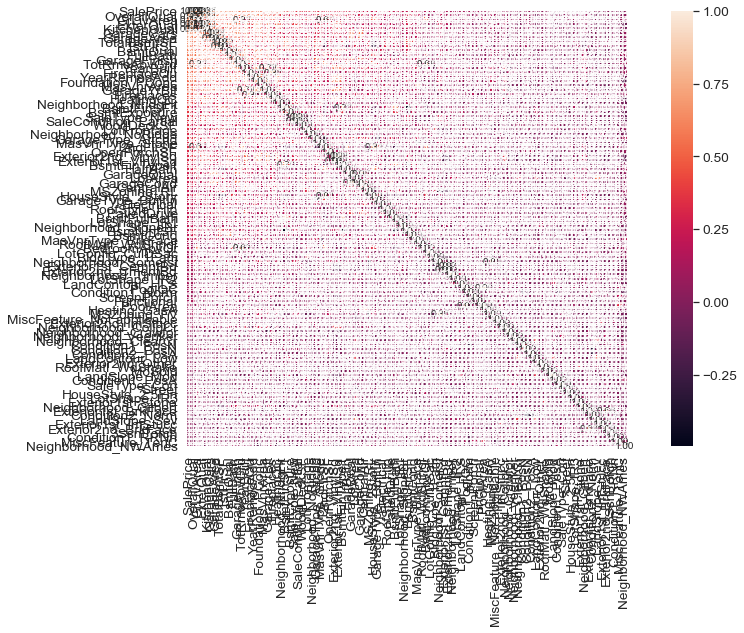

In [58]:
#saleprice correlation matrix
k = 100 #number of variables for heatmap
plt.figure(figsize=(16,8))
corrmat = train.corr()
# picking the top 15 correlated features
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [59]:
train = train[cols]
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual',
       'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'BsmtQual',
       'FullBath', 'GarageFinish', 'TotRmsAbvGrd', 'YearBuilt', 'FireplaceQu',
       'YearRemodAdd', 'Foundation_PConc', 'MasVnrArea', 'GarageYrBlt',
       'Fireplaces', 'HeatingQC', 'Neighborhood_NridgHt', 'BsmtFinSF1',
       'BsmtExposure', 'SaleType_New', 'SaleCondition_Partial', 'WoodDeckSF',
       'LotFrontage', 'Neighborhood_NoRidge', 'GarageType_Attchd',
       'MasVnrType_Stone', '2ndFlrSF', 'OpenPorchSF', 'Exterior2nd_VinylSd',
       'Exterior1st_VinylSd', 'BsmtFinType1', 'HalfBath', 'GarageQual',
       'LotArea', 'GarageCond', 'CentralAir', 'MSZoning_RL',
       'HouseStyle_2Story', 'GarageType_BuiltIn', 'Electrical',
       'RoofStyle_Hip', 'PavedDrive', 'BsmtFullBath', 'LotShape_IR1',
       'Neighborhood_StoneBr', 'BsmtUnfSF', 'BsmtCond', 'MasVnrType_BrkFace',
       'RoofMatl_WdShngl', 'BedroomAbvGr', 'LotConfig_CulDSa

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('SalePrice', axis=1), train['SalePrice'], test_size=0.1, random_state=101)

In [61]:
#X_train.describe()


y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)


C:\Users\emondsa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\emondsa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\emondsa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\emondsa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).t

In [62]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

lm.fit(X_train,y_train)
print(lm)

# print the intercept
print(lm.intercept_)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[-3.19157866e-17]


In [63]:
print(lm.coef_)

[[ 1.77105948e-01  1.11470579e-01  3.96379887e-02  6.10130644e-02
   1.04515086e-01 -8.89476765e-03  3.60501510e-02  1.37927373e-01
   6.62208829e-02  3.76730337e-02  9.78884829e-03  5.39395229e-02
   3.26639725e-02 -2.07073465e-02  2.27061453e-02 -1.48014036e-02
   7.09324469e-02  1.94634949e-03  4.60147713e-02  1.87986189e-02
   1.38826591e-01 -7.58773296e-03  6.73429270e-02  1.31255818e-01
  -7.58830307e-02  2.06424909e-02 -1.57593301e-02  1.01675346e-01
  -6.81335312e-03 -1.84735226e-02  1.39777195e-01  6.59379863e-03
   5.66113589e-02 -3.32857465e-02  2.75656009e-02  7.72737062e-03
   2.36008781e-02  5.41397315e-02 -5.87315593e-02  8.47329907e-03
   2.15392260e-02 -5.45317366e-02  1.59753082e-03 -5.81637924e-03
   3.76941291e-02  7.81365919e-03  2.45923850e-02 -3.56097073e-03
   6.16331622e-02 -6.48970791e-02 -2.95383945e-02 -4.59662591e-02
   7.25467704e-02 -2.28715607e-02  3.12281047e-02  1.07791765e-01
   3.52366525e-02  1.46090880e-01 -1.09226307e-01  2.34991749e-03
   3.19910

In [64]:
predictions = lm.predict(X_test)
predictions= predictions.reshape(-1,1)

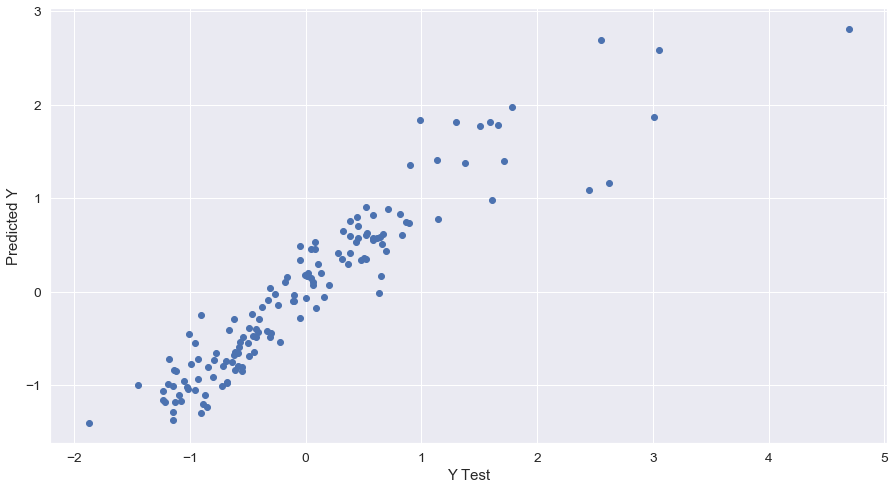

In [65]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [66]:
from sklearn import metrics

In [67]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.23675515108780387
MSE: 0.1266456183695617
RMSE: 0.35587303686787186


In [68]:
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score

In [69]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)

C:\Users\emondsa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [70]:
clf_pred=clf.predict(X_test)
clf_pred= clf_pred.reshape(-1,1)

In [71]:
print('MAE:', metrics.mean_absolute_error(y_test, clf_pred))
print('MSE:', metrics.mean_squared_error(y_test, clf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, clf_pred)))

MAE: 0.22473268890957296
MSE: 0.11582240422006378
RMSE: 0.3403269078695714


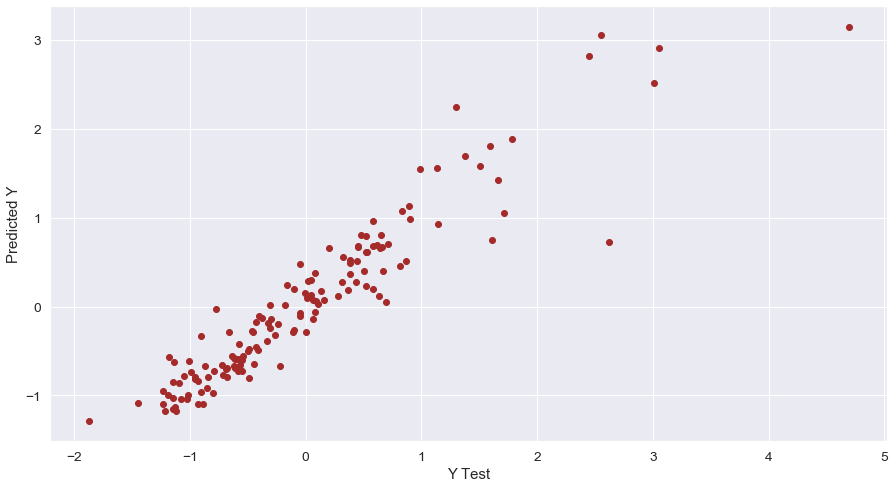

In [72]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,clf_pred, c= 'brown')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [73]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor(random_state = 100)
dtreg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=100, splitter='best')

In [74]:
dtr_pred = dtreg.predict(X_test)
dtr_pred= dtr_pred.reshape(-1,1)

In [75]:
print('MAE:', metrics.mean_absolute_error(y_test, dtr_pred))
print('MSE:', metrics.mean_squared_error(y_test, dtr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)))

MAE: 0.3158321273609761
MSE: 0.20752438819252042
RMSE: 0.4555484476897275


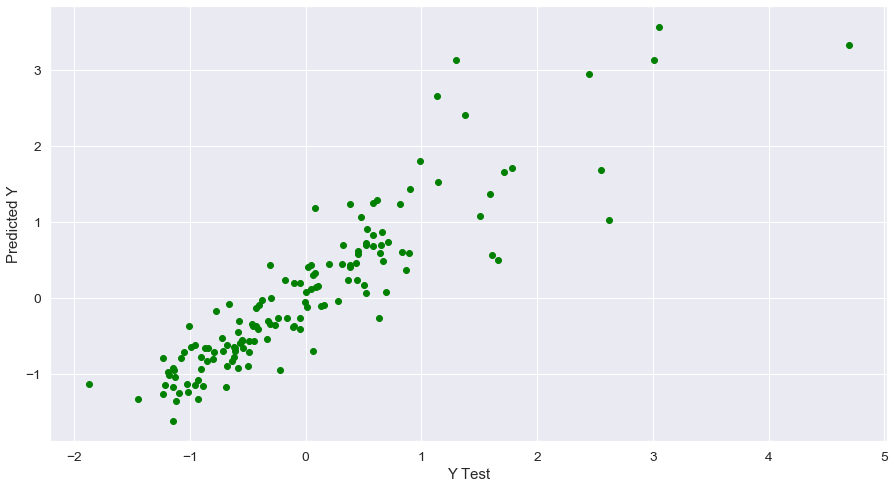

In [76]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,dtr_pred,c='green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [77]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)

C:\Users\emondsa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\emondsa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [78]:
svr_pred = svr.predict(X_test)
svr_pred= svr_pred.reshape(-1,1)

In [79]:
print('MAE:', metrics.mean_absolute_error(y_test, svr_pred))
print('MSE:', metrics.mean_squared_error(y_test, svr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))

MAE: 0.24568160787258156
MSE: 0.16452564528507785
RMSE: 0.4056176096831569


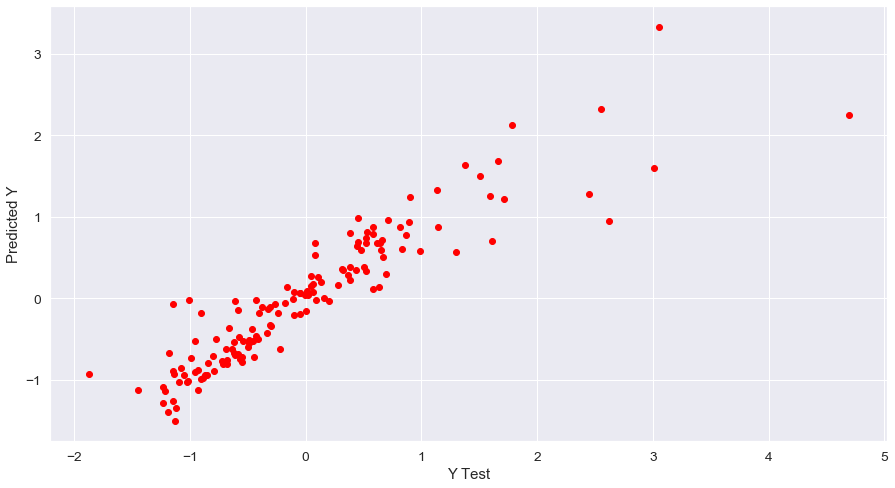

In [80]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,svr_pred, c='red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [81]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 1500, random_state = 0)
rfr.fit(X_train, y_train)

C:\Users\emondsa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1500, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [82]:
rfr_pred= rfr.predict(X_test)
rfr_pred = rfr_pred.reshape(-1,1)

In [83]:
print('MAE:', metrics.mean_absolute_error(y_test, rfr_pred))
print('MSE:', metrics.mean_squared_error(y_test, rfr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))

MAE: 0.22953589286545115
MSE: 0.12624892348217706
RMSE: 0.35531524521497393


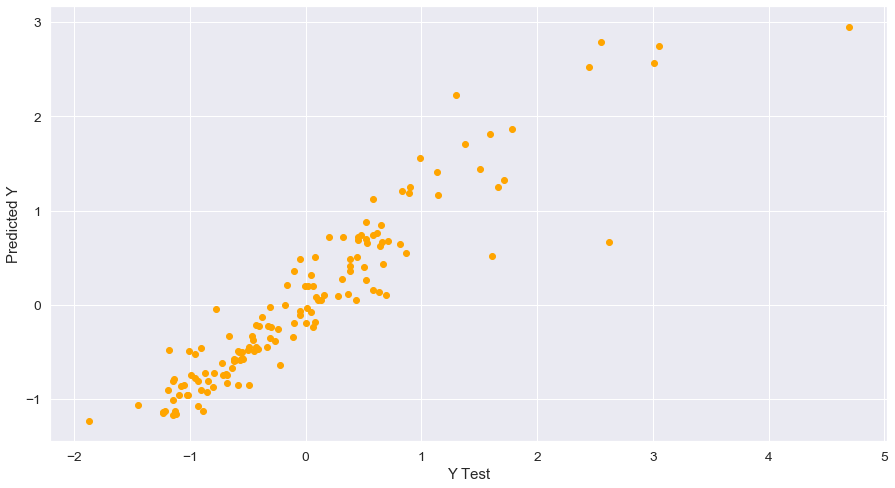

In [84]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,rfr_pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [85]:
error_rate=np.array([metrics.mean_squared_error(y_test, predictions),metrics.mean_squared_error(y_test, clf_pred),metrics.mean_squared_error(y_test, dtr_pred),metrics.mean_squared_error(y_test, svr_pred),metrics.mean_squared_error(y_test, rfr_pred)])

In [86]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [87]:
print('MAE:', metrics.mean_absolute_error(y_test, clf_pred))
print('MSE:', metrics.mean_squared_error(y_test, clf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, clf_pred)))

MAE: 0.22473268890957296
MSE: 0.11582240422006378
RMSE: 0.3403269078695714


Text(0, 0.5, 'rmse')

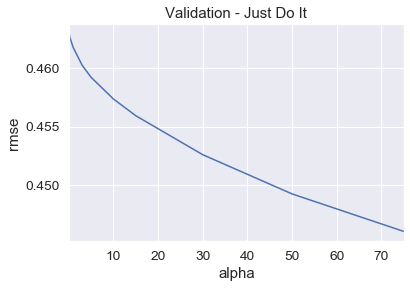

In [88]:
model_ridge = Ridge()

alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

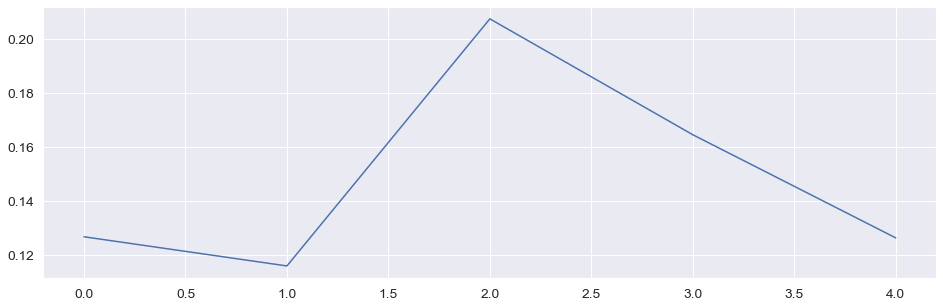

In [89]:
plt.figure(figsize=(16,5))
plt.plot(error_rate)

In [90]:
train[cols]
cols


Index(['SalePrice', 'OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual',
       'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'BsmtQual',
       'FullBath', 'GarageFinish', 'TotRmsAbvGrd', 'YearBuilt', 'FireplaceQu',
       'YearRemodAdd', 'Foundation_PConc', 'MasVnrArea', 'GarageYrBlt',
       'Fireplaces', 'HeatingQC', 'Neighborhood_NridgHt', 'BsmtFinSF1',
       'BsmtExposure', 'SaleType_New', 'SaleCondition_Partial', 'WoodDeckSF',
       'LotFrontage', 'Neighborhood_NoRidge', 'GarageType_Attchd',
       'MasVnrType_Stone', '2ndFlrSF', 'OpenPorchSF', 'Exterior2nd_VinylSd',
       'Exterior1st_VinylSd', 'BsmtFinType1', 'HalfBath', 'GarageQual',
       'LotArea', 'GarageCond', 'CentralAir', 'MSZoning_RL',
       'HouseStyle_2Story', 'GarageType_BuiltIn', 'Electrical',
       'RoofStyle_Hip', 'PavedDrive', 'BsmtFullBath', 'LotShape_IR1',
       'Neighborhood_StoneBr', 'BsmtUnfSF', 'BsmtCond', 'MasVnrType_BrkFace',
       'RoofMatl_WdShngl', 'BedroomAbvGr', 'LotConfig_CulDSa

In [91]:
test=test[['OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual',
       'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'BsmtQual',
       'FullBath', 'GarageFinish', 'TotRmsAbvGrd', 'YearBuilt', 'FireplaceQu',
       'YearRemodAdd', 'Foundation_PConc', 'MasVnrArea', 'GarageYrBlt',
       'Fireplaces', 'HeatingQC', 'Neighborhood_NridgHt', 'BsmtFinSF1',
       'BsmtExposure', 'SaleType_New', 'SaleCondition_Partial',
       'GarageType_Attchd', 'LotFrontage', 'MasVnrType_Stone',
       'Neighborhood_NoRidge', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF',
       'Exterior2nd_VinylSd', 'Exterior1st_VinylSd', 'BsmtFinType1',
       'HalfBath', 'GarageQual', 'LotArea', 'GarageCond', 'CentralAir',
       'MSZoning_RL', 'HouseStyle_2Story', 'RoofStyle_Hip',
       'GarageType_BuiltIn', 'Electrical', 'PavedDrive', 'BsmtFullBath',
       'LotShape_IR1', 'Neighborhood_StoneBr', 'BsmtUnfSF', 'BsmtCond',
       'MasVnrType_BrkFace', 'RoofMatl_WdShngl', 'BedroomAbvGr',
       'LotConfig_CulDSac', 'Neighborhood_Somerst', 'BldgType_1Fam',
       'Exterior1st_CemntBd', 'Exterior2nd_CmentBd', 'Neighborhood_Timber',
       'LotShape_IR2', 'LandContour_HLS', 'PoolQC', 'Condition1_Norm',
       'ScreenPorch', 'Functional', 'Heating_GasA', 'PoolArea', 'MSZoning_FV',
       'Exterior2nd_ImStucc', 'Neighborhood_CollgCr',
       'MiscFeature_Not applicable', 'Neighborhood_Crawfor',
       'Neighborhood_Veenker', 'Neighborhood_ClearCr', 'Condition1_PosN',
       'Condition2_PosN', 'Condition2_PosA', 'MoSold', 'LandContour_Low',
       'Exterior2nd_Other', 'RoofMatl_WdShake', '3SsnPorch', 'LandSlope_Mod',
       'Condition1_PosA', 'SaleType_Con', 'Street', 'LotShape_IR3',
       'HouseStyle_2.5Fin', 'Exterior1st_Stone', 'Neighborhood_Gilbert',
       'Exterior1st_BrkFace', 'Condition2_Norm', 'LandSlope_Sev',
       'Exterior1st_ImStucc', 'Exterior2nd_BrkFace', 'Neighborhood_NWAmes',
       'Condition1_RRNn', 'MiscFeature_TenC']]

In [92]:
a = pd.read_csv("test.csv")

In [93]:
test_id = a['Id']
a = pd.DataFrame(test_id, columns=['Id'])

In [94]:
test = sc_X.fit_transform(test)

C:\Users\emondsa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\emondsa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [95]:
test.shape

(1490, 99)

In [96]:
test_prediction_clf=clf.predict(test)
test_prediction_clf= test_prediction_clf.reshape(-1,1)

In [97]:
test_prediction_clf

array([[ 0.07984788],
       [ 0.1653851 ],
       [-0.53371586],
       ...,
       [-0.23876291],
       [-0.58964591],
       [ 0.56382393]])

In [98]:
test_prediction_clf =sc_y.inverse_transform(test_prediction_clf)

In [99]:
test_prediction_clf = pd.DataFrame(test_prediction_clf, columns=['SalePrice'])

In [100]:
test_prediction_clf.head()

,SalePrice
0,190012.842929
1,196808.488876
2,141267.256560
3,108469.019718
4,189465.888542


In [101]:
result = pd.concat([a,test_prediction_clf], axis=1)

In [102]:
result.head()

,Id,SalePrice
0,1461.0,190012.842929
1,1462.0,196808.488876
2,1463.0,141267.256560
3,1464.0,108469.019718
4,1465.0,189465.888542


In [103]:
result.to_csv('submission.csv',index=False)